# SPECTROGRAM VISUALIZER

In [2]:
import librosa
import torch
import os
import numpy as np
from scipy.signal import stft
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
import matplotlib.pyplot as plt


.mp3 til wav funktion:

In [3]:
def read_mp3(filename, as_float=True , offset = 2.0):
    # If duration is 0, load the entire file, else load the specified duration
    sound, sample_rate = librosa.load(filename, sr=None, mono=True , offset=offset)

    if as_float:
        sound = sound.astype(float)

    return sample_rate, sound


Oscars kode

In [29]:
weights = MobileNet_V2_Weights.DEFAULT
preprocess = weights.transforms()
model = mobilenet_v2(weights=weights).eval()

# Convert sound to spectrogram "images"
def convert_sound(filename, type , offset = 4.0):
    # Load sound from file
    sample_rate, sound = read_mp3(filename,offset=offset)
    audio_length_seconds = len(sound) / sample_rate  # Calculate the audio length in seconds
    # Compute spectrogram
    t, frequency, Z = stft(sound, fs=sample_rate, nperseg=446, noverlap=400)
    # Log of absolute value, scaled between 0 and 1
    Z = np.clip(np.log(np.abs(Z))/10+1, 0, 1)
    # Split spectrogram into a sequence of "grey-scale images"
    window_length = 224
    step_size = 100 if type == "train" else 400
    num_windows = (Z.shape[1]-window_length)//step_size + 1
    spectrograms = np.array([Z[:, (i*step_size):(i*step_size+window_length)] for i in range(num_windows)])
    time_per_spectrogram = audio_length_seconds/spectrograms.shape[0]
    # Expand "color" axis
    spectrograms = np.repeat(spectrograms[:,None], 3, axis=1)
    # Apply appropriate preprocessing from neural network
    T = preprocess(torch.tensor(spectrograms))
    return T, time_per_spectrogram


### SPEKTROGRAM OUTPUT:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


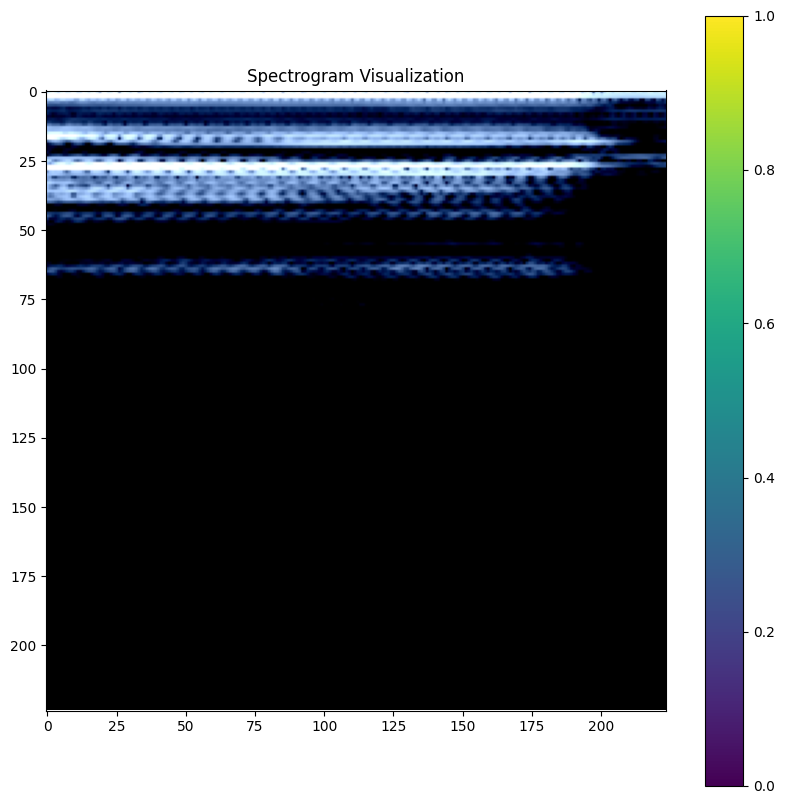

In [52]:
filepath = '/Users/davidlindahl/Desktop/GitHub/singing_speech_NN-main/audio/train/sing/00 - the data - 5pqxLJLmlOo 0.44 3.4fix.mp3' # Indsæt Fil
data = convert_sound(filepath,type , offset=9.1) ; data # Ændre her på offset hvis du vil have et andet spectrogram

sample = data[0][0, :, :, :]

# Convert the torch tensor to a numpy array and transpose the axes
sample_np = sample.numpy().transpose(1, 2, 0)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(sample_np)
plt.colorbar()
plt.show()

